In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!matplotlib inline 

'matplotlib' is not recognized as an internal or external command,
operable program or batch file.


In [100]:
!pip install matplotlib


In [101]:
data= pd.read_csv('titanic/train.csv' )

In [102]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

# Data Visualization

In [103]:
# missing data
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

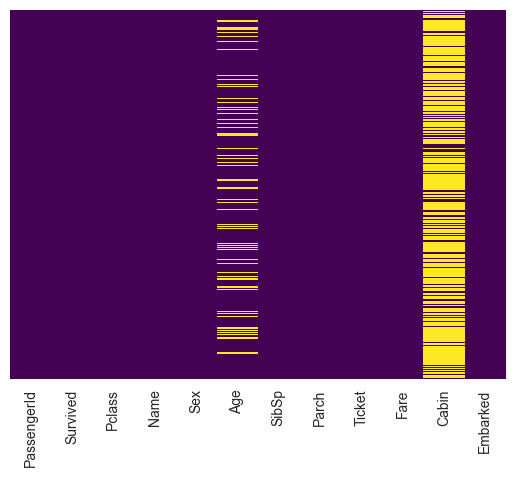

In [104]:
 # using seaborn heatmap to find missing values :

sns.heatmap(data.isnull(), yticklabels = False, cbar = False , cmap = 'viridis')

 yellow is the condition data.isnull() True values 

 a singnificant portion of Cabin data is missing , so we will drop it as info is less or change it to Cabin Known : 1 or 0

<Axes: xlabel='Survived', ylabel='count'>

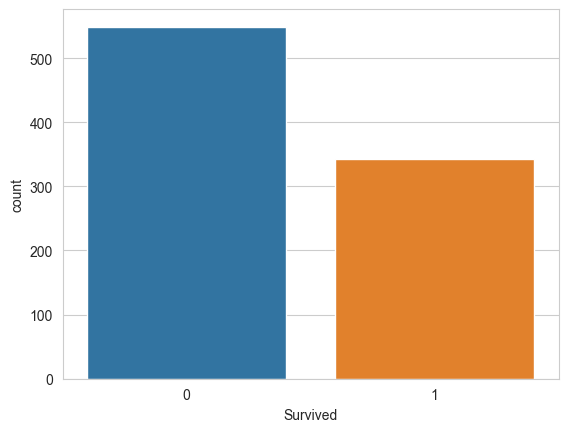

In [105]:
# sns.set_style('whitegrid')
sns.countplot(x = 'Survived' , data= data)

Basically a resonable amount died , next checing it with respect if other features

<Axes: xlabel='Survived', ylabel='count'>

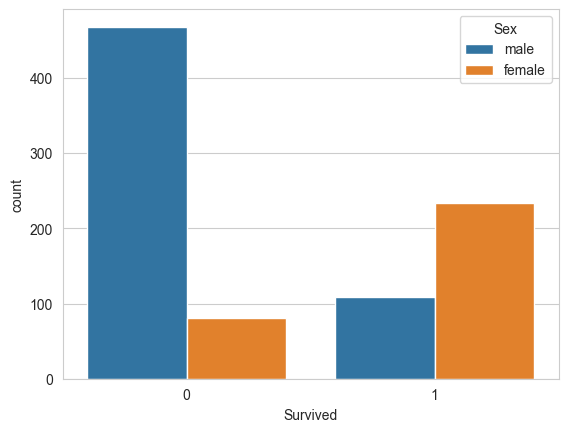

In [106]:
# sns.set_style('whitegrid')
sns.countplot(x = 'Survived' , hue = 'Sex' , data = data )

We can clearly see that the survived ratio to not survived for female is higher then male ,
so female were given more priority 

Going by domain knowledge , female and children were given priority

<Axes: xlabel='Survived', ylabel='count'>

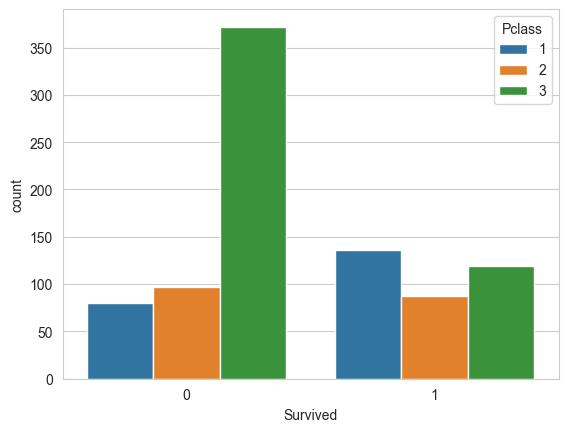

In [107]:
#sns.set_style('whitegrid')
sns.countplot(x = 'Survived' , hue = 'Pclass' ,data = data)

For AGE :

C:\Users\aks\.pyenv\pyenv-win\versions\3.10.9\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


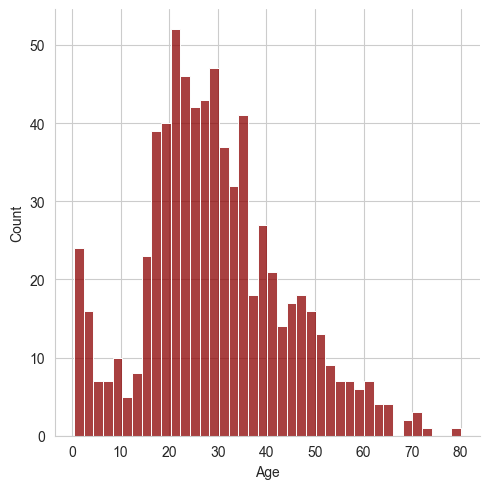

In [108]:
# data['Age'].hist(bins=40,color='darkred',alpha =  0.7)
sns.displot(data['Age'].dropna(),kde = False , color ='darkred', bins =40)
# kde is false as no need of probability density function

A bell curved normal distribution generated for Age  , with some outliers 

<Axes: xlabel='SibSp', ylabel='count'>

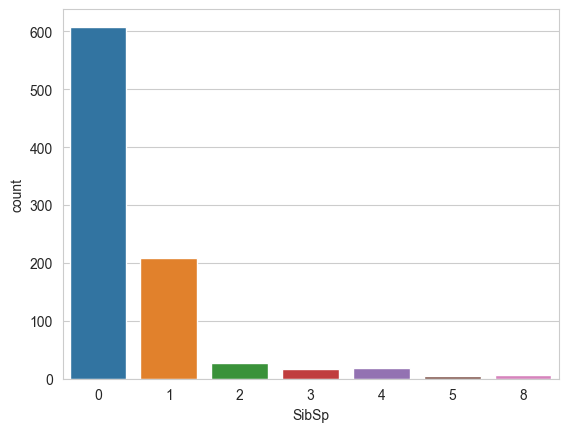

In [109]:
sns.countplot(x='SibSp', data = data)
# sns.countplot(x='SibSp',hue='Survived', data = data)

C:\Users\aks\.pyenv\pyenv-win\versions\3.10.9\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


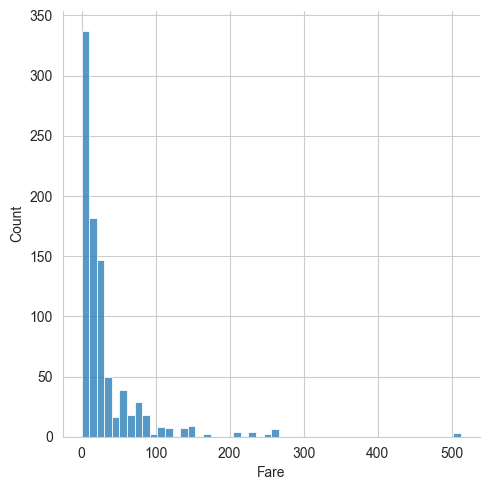

In [110]:
sns.displot( x= 'Fare' , data= data, bins =50)

# Data Cleaning

We have found some relation between passanger class and age , so will imputem missing age value wrt to pclass

<Axes: xlabel='Pclass', ylabel='Age'>

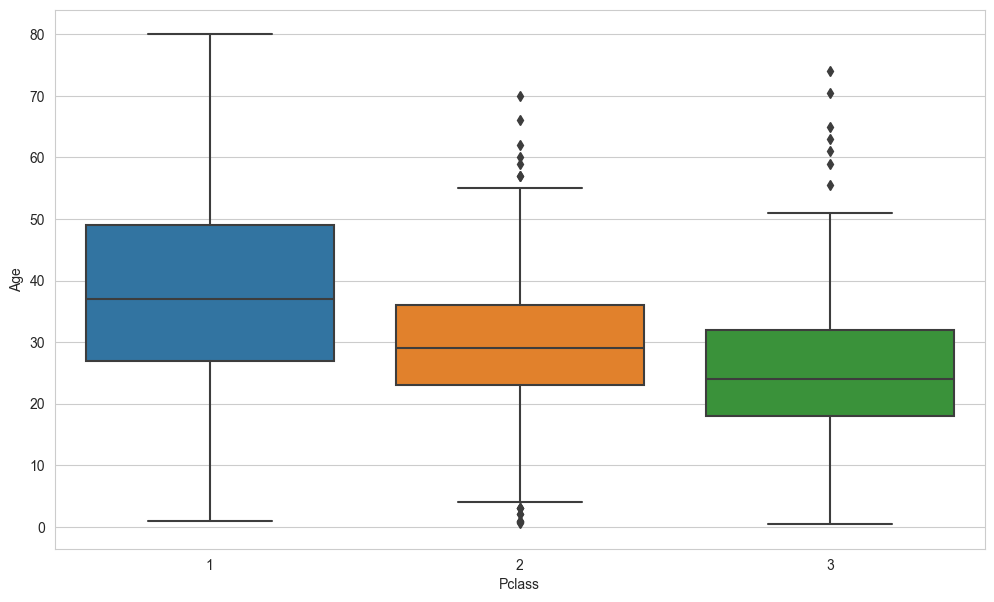

In [111]:
plt.figure(figsize = (12,7))
sns.boxplot(x = 'Pclass' , y = 'Age' , data= data )

In [112]:
def impute_age(cols) :
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else :
        return Age

In [113]:
data['Age'] = data[['Age','Pclass']].apply(impute_age, axis = 1)

C:\Users\aks\AppData\Local\Temp\ipykernel_6868\1908804825.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\aks\AppData\Local\Temp\ipykernel_6868\1908804825.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


Checking the heatmap again

<Axes: >

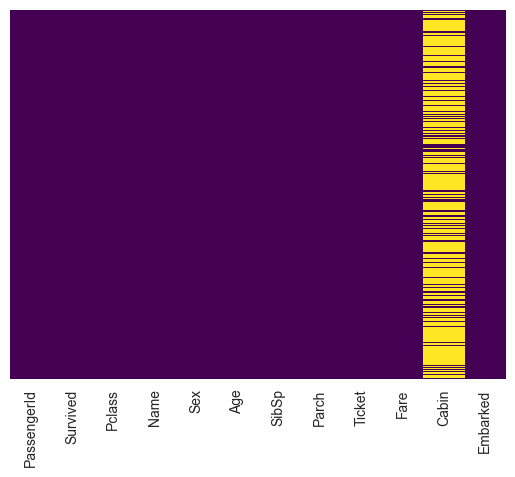

In [114]:
sns.heatmap(data.isnull() , yticklabels = False , cbar = False , cmap = 'viridis')

Cabin has a lot of missing value , so we can either drop it or apply feature eng to impute some value 

In [115]:
data.drop('Cabin', axis = 1 , inplace =True )

<Axes: >

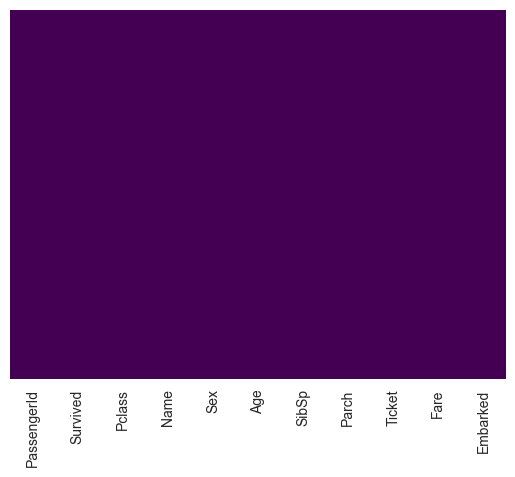

In [116]:
sns.heatmap( data.isnull() , yticklabels = False , cbar = False , cmap ='viridis')

In [117]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

we have fixed missing values only embarked left 

In [118]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [119]:
data['Embarked']=data['Embarked'].fillna('M')
# M -> missing 

In [120]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

From domain knowledge , PassangerId , Name and Ticket columns have no useful information so dropped/not used

## Converting Categorical Features

In [121]:
#pd.get_dummies(data['Embarked'],drop_first = True).head()
# drop_first to avoid dummy variable trap

In [122]:
sex = pd.get_dummies(data['Sex'] , drop_first = True )
embark = pd.get_dummies(data['Embarked'] , drop_first = True )
# or dropping M column from embarked less info less else P dropped

In [123]:
# removing the not required columns :
data.drop(['Sex','Embarked', 'Name', 'Ticket'], axis = 1 , inplace = True )

In [124]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [125]:
data = pd.concat([data,sex,embark] ,axis = 1)

In [126]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,M,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,False,True


### Building a basic Logistic Regression Model

In [129]:
X= data.drop('Survived', axis = 1)
y =data['Survived']

In [131]:
#! pip install scikit-learn

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X_train , X_test , y_train , y_test = train_test_split(X, y  , test_size = 0.3, random_state =0)

### Training and Predicting

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\aks\.pyenv\pyenv-win\versions\3.10.9\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [136]:
preds = logmodel.predict(X_test)

In [137]:
from sklearn.metrics  import confusion_matrix

In [138]:
accuracy = confusion_matrix(y_test, preds)

In [139]:
accuracy

array([[141,  27],
       [ 30,  70]], dtype=int64)

In [140]:
from sklearn.metrics import accuracy_score

In [141]:
accuracy = accuracy_score(y_test , preds)
accuracy

0.7873134328358209